In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rm -rf /kaggle/working/

rm: cannot remove '/kaggle/working/': Device or resource busy


In [3]:
def plot_graph(histories, name, title, colors, models):
    for group in zip(histories, colors, models):
        history = group[0]
        color = group[1]
        model = group[2]
        plt.plot(history[name],label=f"{model}_train_acc", color=color, linestyle="solid")
        plt.plot(history[f'val_{name}'],label=f'{model}_val_acc', color=color, linestyle="dashed")
    plt.title(title)
    plt.xlabel('epochs')
    plt.ylabel(name)
    plt.legend()
    plt.show()

In [4]:
basePath = "/kaggle/input/generatorandcnnwithundersamplingmodelfile/"

In [5]:
LCC_hist = pd.read_csv(f"{basePath}LCC_model_V1_hist.csv")
LMLO_hist = pd.read_csv(f"{basePath}LMLO_model_V1_hist.csv")
RCC_hist = pd.read_csv(f"{basePath}RCC_model_V1_hist.csv")
RMLO_hist = pd.read_csv(f"{basePath}RMLO_model_V1_hist.csv")

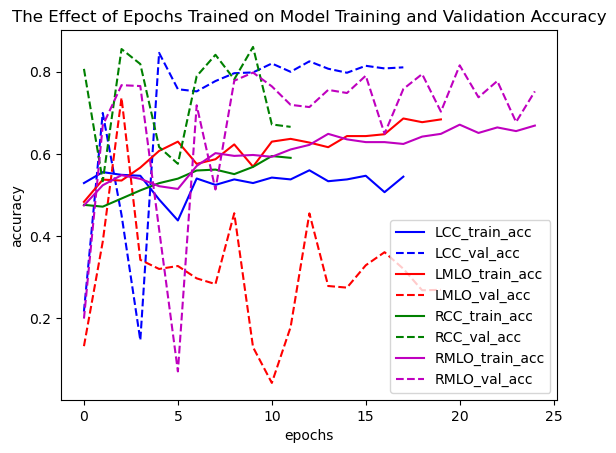

In [6]:
plot_graph([LCC_hist, LMLO_hist, RCC_hist, RMLO_hist], "accuracy", "The Effect of Epochs Trained on Model Training and Validation Accuracy", colors=["b", "r", "g", "m"], models=["LCC", "LMLO", "RCC", "RMLO"])

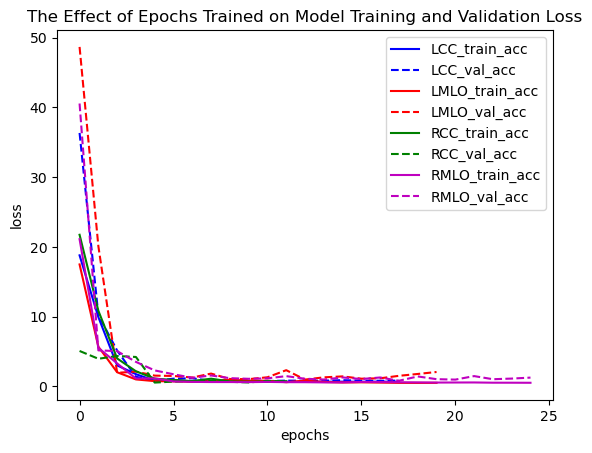

In [7]:
plot_graph([LCC_hist, LMLO_hist, RCC_hist, RMLO_hist], "loss", "The Effect of Epochs Trained on Model Training and Validation Loss", colors=["b", "r", "g", "m"], models=["LCC", "LMLO", "RCC", "RMLO"])

Text(0.5, 1.0, 'Training Data Distribution With Undersampling for Balancing')

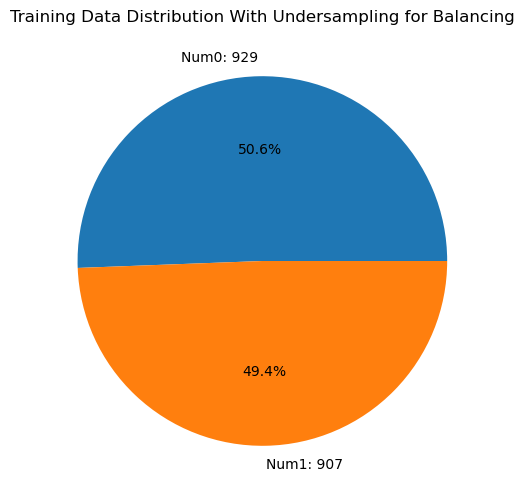

In [8]:
numTrain0 = 929
numTrain1 = 907

probTrain0 = numTrain0/(numTrain0+numTrain1)
probTrain1 = numTrain1/(numTrain0+numTrain1)

data = [probTrain0, probTrain1]
labels = [f"Num0: {numTrain0}", f"Num1: {numTrain1}"]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(data, labels=labels, autopct='%.1f%%')
ax.set_title("Training Data Distribution With Undersampling for Balancing")


Text(0.5, 1.0, 'Validation Data Distribution Without Undersampling')

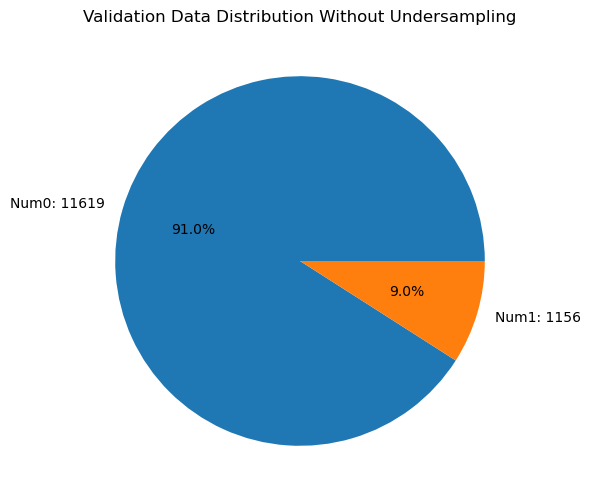

In [9]:
numVal0 = 11619
numVal1 = 1156

probVal0 = numVal0/(numVal0+numVal1)
probVal1 = numVal1/(numVal0+numVal1)

data = [probVal0, probVal1]
labels = [f"Num0: {numVal0}", f"Num1: {numVal1}"]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(data, labels=labels, autopct='%.1f%%')
ax.set_title("Validation Data Distribution Without Undersampling")
